
# BISMILLAHIRRAHMANIRRAHIM

# MENGUMPULKAN DATA

In [1]:
#impor paket
import pandas as pd

In [2]:
#impor data jawaban murid 
df=pd.read_table("train2.tsv")

In [3]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText
0,0,5,3,3,mRNA exits nucleus via nuclear pore. mRNA trav...
1,1,1,1,1,Some additional information that we would need...
2,2,1,1,1,"After reading the expirement, I realized that ..."
3,3,1,1,1,"What you need is more trials, a control set up..."
4,4,1,0,0,The student should list what rock is better an...


In [4]:
#saring data untuk soal nomor 5 saja
df5jaw=df[df['EssaySet']==5]
df5jaw

,Id,EssaySet,Score1,Score2,EssayText
0,0,5,3,3,mRNA exits nucleus via nuclear pore. mRNA trav...
6580,10967,5,1,1,The mRNA travels to the ribosomes. At the ribo...
6581,10968,5,0,0,ATP is created and broken down.It is broken do...
6582,10969,5,0,0,The mRNA first gets on an electron transport c...
6583,10970,5,0,0,"The mRNA then travels to the mitochondria, whe..."
...,...,...,...,...,...
8370,12757,5,0,0,protein synthesis give the body protein so it ...
8371,12758,5,0,0,the code has to change.
8372,12759,5,0,0,it takes it to whatever place it goes then tak...
8373,12760,5,0,0,"mRNA goes to the cytoplasm.There, it makes cop..."


Text(0, 0.5, 'Frekuensi')

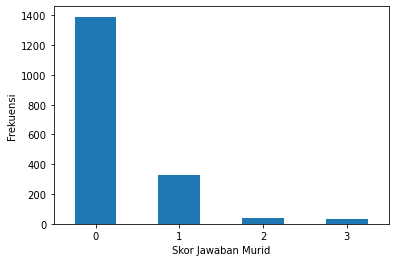

In [5]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
df5jaw.groupby('Score1').size().plot.bar()
ax = plt.gca()
labels =["0","1","2","3"]
ax.set_xticklabels(labels=labels,rotation=0)
plt.xlabel("Skor Jawaban Murid")
plt.ylabel("Frekuensi")

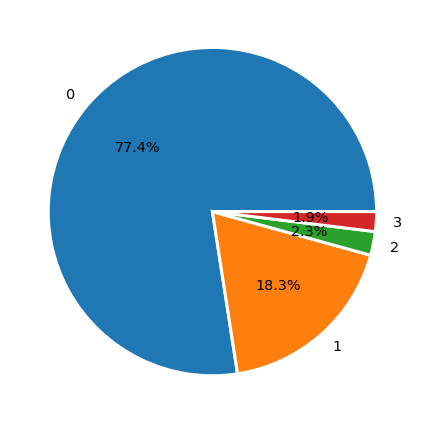

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df5jaw.groupby('Score1').size(), labels=labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.tight_layout()

In [7]:
#ambil data kunci jawaban
with open('no5bener.txt') as f:
    jaw5bener = f.read()
    print(jaw5bener)

mRNA exits nucleus via nuclear pore. mRNA travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum.mRNA bases are read in triplets called codons (by rRNA). tRNA carrying the complementary (U=A,C+G) anticodon recognizes the complementary codon of the mRNA. The corresponding amino acids on the other end of the tRNA are bonded to adjacent tRNAâ€™s amino acids. A new corresponding amino acid is added to the tRNA. Amino acids are linked together to make a protein beginning with a START codon in the P site (initiation). Amino acids continue to be linked until a STOP codon is read on the mRNA in the A site (elongation and termination).



# PRE PROCESSING TEXT 

In [8]:
#Impor Paket
import nltk
import numpy as np
import re

In [9]:
jaw5=df5jaw['EssayText']

In [10]:
#Lowercasing

jaw5=jaw5.str.lower()
jaw5bener=np.char.lower(jaw5bener)

In [11]:
#Remove Punctuation

pd.set_option('max_colwidth', None)

items = []
for kata in jaw5:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", kata).split()))
    items.append(item)
jaw5 = pd.DataFrame(data=items, columns=['jawaban 5'])
jaw5


,jawaban 5
0,mrna exits nucleus via nuclear pore mrna travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum mrna bases are read in triplets called codons by rrna trna carrying the complementary u a c g anticodon recognizes the complementary codon of the mrna the corresponding amino acids on the other end of the trna are bonded to adjacent trna s amino acids a new corresponding amino acid is added to the trna amino acids are linked together to make a protein beginning with a start codon in the p site initiation amino acids continue to be linked until a stop codon is read on the mrna in the a site elongation and termination
1,the mrna travels to the ribosomes at the ribosomes the mrna is copied so that is can be used to create proteins the copies mrna is then used as instructions to create proteins the proteins are made using the instructions given
2,atp is created and broken down it is broken down when 2 phosphate groups don t connect with the third causing adp adp can make atp again by remaking itself
3,the mrna first gets on an electron transport chain
4,the mrna then travels to the mitochondria where it is then copied then one mrna goes to the nucleus while the other goes to the ribosomes where it transfers its infornmation to the organelle the organelle then reads the infornmation and makes proteins
...,...
1791,protein synthesis give the body protein so it can maintain at tip top shape without this are body could not survive
1792,the code has to change
1793,it takes it to whatever place it goes then takes it to all of the other rnas
1794,mrna goes to the cytoplasm there it makes copies of itself trna is made rna is connected to a strand of dna


In [12]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
for i in symbols:
    jaw5bener = np.char.replace(jaw5bener, i, ' ')
jaw5bener

array('mrna exits nucleus via nuclear pore  mrna travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum mrna bases are read in triplets called codons  by rrna   trna carrying the complementary  u a,c g  anticodon recognizes the complementary codon of the mrna  the corresponding amino acids on the other end of the trna are bonded to adjacent trnaâ€™s amino acids  a new corresponding amino acid is added to the trna  amino acids are linked together to make a protein beginning with a start codon in the p site  initiation   amino acids continue to be linked until a stop codon is read on the mrna in the a site  elongation and termination   ',
      dtype='<U668')

In [13]:
#Tokenize
nltk.download('punkt')
jaw5t = []
for i in jaw5['jawaban 5']:
    jaw5t.append(nltk.word_tokenize(i))
jaw5t

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['mrna',
  'exits',
  'nucleus',
  'via',
  'nuclear',
  'pore',
  'mrna',
  'travels',
  'through',
  'the',
  'cytoplasm',
  'to',
  'the',
  'ribosome',
  'or',
  'enters',
  'the',
  'rough',
  'endoplasmic',
  'reticulum',
  'mrna',
  'bases',
  'are',
  'read',
  'in',
  'triplets',
  'called',
  'codons',
  'by',
  'rrna',
  'trna',
  'carrying',
  'the',
  'complementary',
  'u',
  'a',
  'c',
  'g',
  'anticodon',
  'recognizes',
  'the',
  'complementary',
  'codon',
  'of',
  'the',
  'mrna',
  'the',
  'corresponding',
  'amino',
  'acids',
  'on',
  'the',
  'other',
  'end',
  'of',
  'the',
  'trna',
  'are',
  'bonded',
  'to',
  'adjacent',
  'trna',
  's',
  'amino',
  'acids',
  'a',
  'new',
  'corresponding',
  'amino',
  'acid',
  'is',
  'added',
  'to',
  'the',
  'trna',
  'amino',
  'acids',
  'are',
  'linked',
  'together',
  'to',
  'make',
  'a',
  'protein',
  'beginning',
  'with',
  'a',
  'start',
  'codon',
  'in',
  'the',
  'p',
  'site',
  'initia

In [14]:
range(len(jaw5))
jaw5

,jawaban 5
0,mrna exits nucleus via nuclear pore mrna travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum mrna bases are read in triplets called codons by rrna trna carrying the complementary u a c g anticodon recognizes the complementary codon of the mrna the corresponding amino acids on the other end of the trna are bonded to adjacent trna s amino acids a new corresponding amino acid is added to the trna amino acids are linked together to make a protein beginning with a start codon in the p site initiation amino acids continue to be linked until a stop codon is read on the mrna in the a site elongation and termination
1,the mrna travels to the ribosomes at the ribosomes the mrna is copied so that is can be used to create proteins the copies mrna is then used as instructions to create proteins the proteins are made using the instructions given
2,atp is created and broken down it is broken down when 2 phosphate groups don t connect with the third causing adp adp can make atp again by remaking itself
3,the mrna first gets on an electron transport chain
4,the mrna then travels to the mitochondria where it is then copied then one mrna goes to the nucleus while the other goes to the ribosomes where it transfers its infornmation to the organelle the organelle then reads the infornmation and makes proteins
...,...
1791,protein synthesis give the body protein so it can maintain at tip top shape without this are body could not survive
1792,the code has to change
1793,it takes it to whatever place it goes then takes it to all of the other rnas
1794,mrna goes to the cytoplasm there it makes copies of itself trna is made rna is connected to a strand of dna


In [15]:
#Lemmatisasi
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
lemma=[]
for i in range(len(jaw5t)):
    lemmat = [lemmatizer.lemmatize(word) for word in jaw5t[i]]
    lemma.append(lemmat)
print(lemma)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['mrna', 'exit', 'nucleus', 'via', 'nuclear', 'pore', 'mrna', 'travel', 'through', 'the', 'cytoplasm', 'to', 'the', 'ribosome', 'or', 'enters', 'the', 'rough', 'endoplasmic', 'reticulum', 'mrna', 'base', 'are', 'read', 'in', 'triplet', 'called', 'codon', 'by', 'rrna', 'trna', 'carrying', 'the', 'complementary', 'u', 'a', 'c', 'g', 'anticodon', 'recognizes', 'the', 'complementary', 'codon', 'of', 'the', 'mrna', 'the', 'corresponding', 'amino', 'acid', 'on', 'the', 'other', 'end', 'of', 'the', 'trna', 'are', 'bonded', 'to', 'adjacent', 'trna', 's', 'amino', 'acid', 'a', 'new', 'corresponding', 'amino', 'acid', 'is', 'added', 'to', 'the', 'trna', 'amino', 'acid', 'are', 'linked', 'together', 'to', 'make', 'a', 'protein', 'beginning', 'with', 'a', 'start', 'codon', 'in', 'the', 'p', 'site', 'initiation', 'amino', 'acid', 'continue', 'to', 'be', 'linked', 'until', 'a', 'stop', 'codon', 'is', 'read', 'on', 'the', 'mrna', 'in', 'the', 'a', 'site', 'elongation', 'and', 'termination'], ['the',

In [16]:
#list of list to list of sentence

lst=[]
for i in range(len(lemma)):
    lst.append(' '.join(word for word in lemma[i]))
lst

['mrna exit nucleus via nuclear pore mrna travel through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum mrna base are read in triplet called codon by rrna trna carrying the complementary u a c g anticodon recognizes the complementary codon of the mrna the corresponding amino acid on the other end of the trna are bonded to adjacent trna s amino acid a new corresponding amino acid is added to the trna amino acid are linked together to make a protein beginning with a start codon in the p site initiation amino acid continue to be linked until a stop codon is read on the mrna in the a site elongation and termination',
 'the mrna travel to the ribosome at the ribosome the mrna is copied so that is can be used to create protein the copy mrna is then used a instruction to create protein the protein are made using the instruction given',
 'atp is created and broken down it is broken down when 2 phosphate group don t connect with the third causing adp adp can make atp ag

# TEXT SIMILARITY

In [17]:
#Impor Paket
import math

#Definisi Fungsi Cosine Similarity
def cosine_sim(vec1, vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    return dot_prod / (mag_1 * mag_2)

In [18]:
#Hitung Cosine Similarity dari Matriks Bag of Words
cosineBoW=[]
for i in range(len(lst)):
    bagOfWordsA = lst[0].split(' ')
    bagOfWordsB = lst[i].split(' ')
    uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))
    numOfWordsA = dict.fromkeys(uniqueWords, 0)
    for word in bagOfWordsA:
        numOfWordsA[word] += 1
    numOfWordsB = dict.fromkeys(uniqueWords, 0)
    for word in bagOfWordsB:
        numOfWordsB[word] += 1
    cosineBoW.append(cosine_sim(numOfWordsA.values(),numOfWordsB.values()))
cosineBoW

[0.9999999999999999,
 0.6400917836409653,
 0.15938389443871553,
 0.3200102404915462,
 0.5903583868279114,
 0.6981921403823017,
 0.32657175514334696,
 0.5366154665343712,
 0.5195724808631702,
 0.6624726152368033,
 0.5905317179269713,
 0.6578720992143771,
 0.5581404279634193,
 0.7060406801607321,
 0.0,
 0.7447253796007095,
 0.6495574257478736,
 0.0,
 0.43419023050166816,
 0.6407473642167661,
 0.2814583171411154,
 0.0,
 0.4401317546575081,
 0.6428968683101612,
 0.32334299318871845,
 0.6743671369633878,
 0.7720545375628813,
 0.0,
 0.5566522713077471,
 0.6260410003771673,
 0.7843638023906815,
 0.3135447206678482,
 0.2823054988605553,
 0.6179546393034532,
 0.2660830088043224,
 0.6633944270934279,
 0.3842122429322725,
 0.7334811498405807,
 0.5796073675004739,
 0.35614299362328655,
 0.6512719446815896,
 0.6462273484230018,
 0.5703234321017339,
 0.0,
 0.322451010818512,
 0.16112126316514655,
 0.4897140569370998,
 0.17351520648554244,
 0.0,
 0.5640180488663502,
 0.0,
 0.714244631405256,
 0.02146

In [19]:
#Gabungkan hasil dengan dataframe awal

df2=pd.DataFrame(cosineBoW, columns=['cosine_similarity'])
dfhasil = pd.concat([df2, df5jaw.reset_index()], axis=1)
dfhasil

,cosine_similarity,index,Id,EssaySet,Score1,Score2,EssayText
0,1.000000,0,0,5,3,3,"mRNA exits nucleus via nuclear pore. mRNA travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum.mRNA bases are read in triplets called codons (by rRNA). tRNA carrying the complementary (U=A,C+G) anticodon recognizes the complementary codon of the mRNA. The corresponding amino acids on the other end of the tRNA are bonded to adjacent tRNA’s amino acids. A new corresponding amino acid is added to the tRNA. Amino acids are linked together to make a protein beginning with a START codon in the P site (initiation). Amino acids continue to be linked until a STOP codon is read on the mRNA in the A site (elongation and termination)."
1,0.640092,6580,10967,5,1,1,"The mRNA travels to the ribosomes. At the ribosomes the mRNA is copied so that is can be used to create proteins.The copies mRNA is then used as instructions to create proteins.The proteins are made, using the instructions given."
2,0.159384,6581,10968,5,0,0,ATP is created and broken down.It is broken down when 2 phosphate groups don't connect with the third causing ADP.ADP can make ATP again by remaking itself.
3,0.320010,6582,10969,5,0,0,The mRNA first gets on an electron transport chain.
4,0.590358,6583,10970,5,0,0,"The mRNA then travels to the mitochondria, where it is then copied.Then one mRNA goes to the nucleus while the other goes to the ribosomes, where it transfers its infornmation to the organelle. The organelle then reads the infornmation and makes proteins."
...,...,...,...,...,...,...,...
1791,0.172806,8370,12757,5,0,0,"protein synthesis give the body protein so it can maintain at tip top shape,without this are body could not survive"
1792,0.386405,8371,12758,5,0,0,the code has to change.
1793,0.217256,8372,12759,5,0,0,it takes it to whatever place it goes then takes it to all of the other RNAs
1794,0.435429,8373,12760,5,0,0,"mRNA goes to the cytoplasm.There, it makes copies of itself.tRNA is made.RNA is connected to a strand of DNA."


In [20]:
#Visualisasi Hasil Cosine Similarity
import seaborn as sns

X = dfhasil.cosine_similarity
y = dfhasil.Score1

Text(0, 0.5, 'Skor Jawaban Murid')

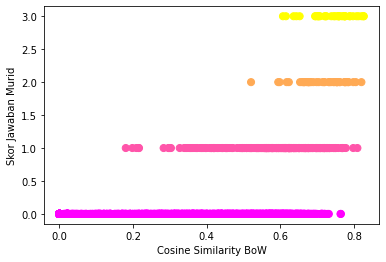

In [21]:
plt.scatter(X[1:], y[1:], c=y[1:], s=50, cmap='spring')
plt.xlabel("Cosine Similarity BoW")
plt.ylabel("Skor Jawaban Murid")

# LSI

In [22]:
import os.path
from gensim import corpora
from gensim.models import LsiModel

In [23]:
#Impor Paket
import nltk
import re
import numpy as np
from gensim import corpora, similarities
from gensim.models import LsiModel
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")

#Proses
documents_test=lemma[0] 
documents_train=lemma[1:]
dictionary = corpora.Dictionary(
    lemma
   for lemma in lemma)
corpus = [
  dictionary.doc2bow(lemma)
  for lemma in lemma]
lsi_model = LsiModel(
        corpus=corpus,
        id2word=dictionary 
        )
print(lsi_model.get_topics())
print([lsi_model[lemma] for lemma in corpus])
cosine_similarity_matrix = similarities.MatrixSimilarity(lsi_model[corpus])
print([row for row in cosine_similarity_matrix])
vector_lsi_test = lsi_model[dictionary.doc2bow(documents_test)]
cosine_similarities_test = cosine_similarity_matrix[vector_lsi_test]
#vector_lsi_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[-1.24421025e-01 -8.45393749e-02 -3.33351925e-03 ... -1.76949942e-04
  -1.76949942e-04 -1.76949942e-04]
 [-1.38650037e-02  6.32943512e-02 -1.81861631e-03 ... -7.59087081e-05
  -7.59087081e-05 -7.59087081e-05]
 [-4.72131118e-01 -4.20163047e-01 -7.72443364e-03 ... -2.08356500e-04
  -2.08356500e-04 -2.08356500e-04]
 ...
 [ 1.13684907e-02  1.03039945e-01  3.31690323e-02 ...  5.67480893e-03
   5.67480893e-03  5.67480893e-03]
 [-2.17493314e-03  1.03315691e-01 -1.70357570e-02 ... -1.44914447e-02
  -1.44914447e-02 -1.44914447e-02]
 [ 3.23201174e-03 -2.96672093e-02  2.42622109e-02 ... -2.97053553e-03
  -2.97053553e-03 -2.97053553e-03]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([0.99999994, 0.64793456, 0.17105463, ..., 0.22311279, 0.44790173,
       0.69478285], dtype=float32), array([0.64793456, 0.9999995 , 0.22488032, ..., 0.23671281, 0.45515895,
       0.6407256 ], dtype=float32), array([0.17105463, 0.22488032, 1.0000002 , ..., 0.15295596, 0.2661664 ,
       0.2457375 ], dtype=float32), array([0.34433076, 0.33668673, 0.07105113, ..., 0.06048   , 0.13502288,
       0.29776266], dtype=float32), array([0.61043847, 0.7209811 , 0.21962425, ..., 0.5437162 , 0.43708295,
       0.6797979 ], dtype=float32), array([0.7093913 , 0.62275475, 0.20252395, ..., 0.20194921, 0.3030564 ,
       0.67926353], dtype=float32), array([0.3436989 , 0.40686935, 0.07286181, ..., 0.34963083, 0.300245  ,
       0.3887587 ], dtype=float32), array([0.5541982 , 0.6065497 , 0.16928074, ..., 0.28611577, 0.3285814 ,
       0.74796385], dtype=float32), array([0.54009444, 0.57735455, 0.28512633, ..., 0.09887554, 0.34814438,
       0.50466293], dtype=float32), array([0.67415065, 0.676729

In [98]:
#Impor Paket
import nltk
import re
import numpy as np
from gensim import corpora, similarities
from gensim.models import LsiModel
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")

#Proses
documents_test=lemma[0] 
documents_train=lemma[1:]
dictionary = corpora.Dictionary(
    lemma
   for lemma in lemma)
corpus = [
  dictionary.doc2bow(lemma)
  for lemma in lemma]
lsi_model = LsiModel(
        corpus=corpus,
        id2word=dictionary 
        )
print(lsi_model.get_topics())
print([lsi_model[lemma] for lemma in corpus])
cosine_similarity_matrix = similarities.MatrixSimilarity(lsi_model[corpus])
print([row for row in cosine_similarity_matrix])
vector_lsi_test = lsi_model[dictionary.doc2bow(documents_test)]
cosine_similarities_test = cosine_similarity_matrix[vector_lsi_test]
#vector_lsi_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[-1.24421025e-01 -8.45393748e-02 -3.33351934e-03 ... -1.76949946e-04
  -1.76949946e-04 -1.76949946e-04]
 [ 1.38650109e-02 -6.32943645e-02  1.81858230e-03 ...  7.58854915e-05
   7.58854915e-05  7.58854915e-05]
 [ 4.72131124e-01  4.20163064e-01  7.72464057e-03 ...  2.08350576e-04
   2.08350576e-04  2.08350576e-04]
 ...
 [ 2.58707407e-03  1.61448913e-02  6.61762959e-03 ...  9.47870185e-03
   9.47870185e-03  9.47870185e-03]
 [ 9.13347951e-04  3.17385590e-02  3.61789371e-02 ...  8.34075877e-03
   8.34075877e-03  8.34075877e-03]
 [ 5.09224272e-04  1.12154878e-01  6.02542849e-03 ... -9.11973000e-03
  -9.11973000e-03 -9.11973000e-03]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([0.9999999 , 0.64804345, 0.17059076, ..., 0.2232075 , 0.44805717,
       0.6941786 ], dtype=float32), array([0.64804345, 0.99999994, 0.2241983 , ..., 0.23692201, 0.45532265,
       0.6401492 ], dtype=float32), array([0.17059076, 0.2241983 , 0.9999998 , ..., 0.15276065, 0.26484764,
       0.24396726], dtype=float32), array([0.34431544, 0.33700928, 0.07013482, ..., 0.06004375, 0.13548   ,
       0.29733956], dtype=float32), array([0.610026  , 0.72046804, 0.22087371, ..., 0.54344654, 0.43677032,
       0.67896485], dtype=float32), array([0.7090715 , 0.62293977, 0.20201129, ..., 0.20200557, 0.3029219 ,
       0.679379  ], dtype=float32), array([0.34357643, 0.4076205 , 0.06949364, ..., 0.34867522, 0.30016086,
       0.38859558], dtype=float32), array([0.5555476 , 0.6071161 , 0.17004831, ..., 0.28678653, 0.32831082,
       0.7474021 ], dtype=float32), array([0.5404939 , 0.5776471 , 0.28473076, ..., 0.09916222, 0.34799173,
       0.5047719 ], dtype=float32), array([0.67441565, 0.676930

In [99]:
vector_lsi_test

[(0, -16.876342266324652),
 (1, -3.5223569592104047),
 (2, 7.636755896496675),
 (3, 0.36037663040790385),
 (4, -1.2016024893722153),
 (5, -0.5432540252500844),
 (6, -1.7258404991932452),
 (7, -0.3507547074231203),
 (8, -0.13011423859781532),
 (9, 0.6555571173391181),
 (10, -0.10613906285280489),
 (11, -1.1880590833075322),
 (12, 0.0038729611451557566),
 (13, 1.3070527998619617),
 (14, -0.672030349361212),
 (15, 0.9261520254956043),
 (16, 1.9604834868818275),
 (17, 0.5293861476745576),
 (18, 1.6871171666477303),
 (19, -0.28318830573624004),
 (20, 0.3967298782651569),
 (21, 0.760726348166792),
 (22, -1.0037000844710586),
 (23, 0.3198833014427894),
 (24, -2.01898694494147),
 (25, 1.4641013626058001),
 (26, -0.9429528901783318),
 (27, -0.8478551327390222),
 (28, 0.1027820515551542),
 (29, 0.5934952540344675),
 (30, 0.3108601928844446),
 (31, 0.9277889302820193),
 (32, -1.624234712552481),
 (33, -0.08230450745510234),
 (34, -0.2059933650463252),
 (35, -0.4009687155943213),
 (36, -0.84900708

In [101]:
#Impor Paket
import nltk
import re
import numpy as np
from gensim import corpora, similarities
from gensim.models import LsiModel
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")

#Proses
documents_test=['sarah']
documents_train=[['sarah'],['shabrina']]
dictionary = corpora.Dictionary(
    lemma
   for lemma in lemma)
corpus = [
  dictionary.doc2bow(lemma)
  for lemma in lemma]
lsi_model = LsiModel(
        corpus=corpus,
        id2word=dictionary 
        )
print(lsi_model.get_topics())
print([lsi_model[lemma] for lemma in corpus])
cosine_similarity_matrix = similarities.MatrixSimilarity(lsi_model[corpus])
print([row for row in cosine_similarity_matrix])
vector_lsi_test = lsi_model[dictionary.doc2bow(documents_test)]
cosine_similarities_test = cosine_similarity_matrix[vector_lsi_test]
#vector_lsi_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[-1.24421025e-01 -8.45393749e-02 -3.33351925e-03 ... -1.76949954e-04
  -1.76949954e-04 -1.76949954e-04]
 [ 1.38650033e-02 -6.32943594e-02  1.81866536e-03 ...  7.59206115e-05
   7.59206115e-05  7.59206115e-05]
 [ 4.72131140e-01  4.20163070e-01  7.72449242e-03 ...  2.08387276e-04
   2.08387276e-04  2.08387276e-04]
 ...
 [-1.02114202e-02 -1.06979424e-01 -2.86872990e-02 ... -3.83842243e-04
  -3.83842243e-04 -3.83842243e-04]
 [ 5.00912183e-03 -8.39235116e-02  3.57399764e-02 ...  1.33706996e-02
   1.33706996e-02  1.33706996e-02]
 [ 4.65934990e-03  3.93500180e-02 -5.15347071e-03 ... -2.07169819e-03
  -2.07169819e-03 -2.07169819e-03]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([1.        , 0.6483512 , 0.1701228 , ..., 0.22318551, 0.44773817,
       0.6949215 ], dtype=float32), array([0.6483512 , 1.0000001 , 0.22389987, ..., 0.23694558, 0.45513618,
       0.6407738 ], dtype=float32), array([0.1701228 , 0.22389987, 0.99999964, ..., 0.15287347, 0.2655067 ,
       0.24402109], dtype=float32), array([0.34473425, 0.33698565, 0.07079679, ..., 0.06030244, 0.13521177,
       0.29821527], dtype=float32), array([0.6102488 , 0.7206816 , 0.21958025, ..., 0.54404265, 0.43659642,
       0.6785531 ], dtype=float32), array([0.7094715 , 0.62296814, 0.20220232, ..., 0.20183356, 0.30267006,
       0.6796943 ], dtype=float32), array([0.34327635, 0.407358  , 0.06863854, ..., 0.3489381 , 0.30055463,
       0.3894709 ], dtype=float32), array([0.554434  , 0.60723245, 0.17115434, ..., 0.28633827, 0.3296516 ,
       0.74755174], dtype=float32), array([0.5403557 , 0.5773516 , 0.28479087, ..., 0.09894717, 0.34807616,
       0.5051436 ], dtype=float32), array([0.6744013 , 0.677040

In [102]:
vector_lsi_test

[]

In [24]:
#Penggabungan dengan DF awal
dflsa=pd.DataFrame(cosine_similarities_test, columns=['cosine_similarity_LSA'])
dfakhir = pd.concat([dflsa, dfhasil.reset_index()], axis=1)
dfakhir

,cosine_similarity_LSA,level_0,cosine_similarity,index,Id,EssaySet,Score1,Score2,EssayText
0,1.000000,0,1.000000,0,0,5,3,3,"mRNA exits nucleus via nuclear pore. mRNA travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum.mRNA bases are read in triplets called codons (by rRNA). tRNA carrying the complementary (U=A,C+G) anticodon recognizes the complementary codon of the mRNA. The corresponding amino acids on the other end of the tRNA are bonded to adjacent tRNA’s amino acids. A new corresponding amino acid is added to the tRNA. Amino acids are linked together to make a protein beginning with a START codon in the P site (initiation). Amino acids continue to be linked until a STOP codon is read on the mRNA in the A site (elongation and termination)."
1,0.647934,1,0.640092,6580,10967,5,1,1,"The mRNA travels to the ribosomes. At the ribosomes the mRNA is copied so that is can be used to create proteins.The copies mRNA is then used as instructions to create proteins.The proteins are made, using the instructions given."
2,0.171055,2,0.159384,6581,10968,5,0,0,ATP is created and broken down.It is broken down when 2 phosphate groups don't connect with the third causing ADP.ADP can make ATP again by remaking itself.
3,0.344331,3,0.320010,6582,10969,5,0,0,The mRNA first gets on an electron transport chain.
4,0.610438,4,0.590358,6583,10970,5,0,0,"The mRNA then travels to the mitochondria, where it is then copied.Then one mRNA goes to the nucleus while the other goes to the ribosomes, where it transfers its infornmation to the organelle. The organelle then reads the infornmation and makes proteins."
...,...,...,...,...,...,...,...,...,...
1791,0.203835,1791,0.172806,8370,12757,5,0,0,"protein synthesis give the body protein so it can maintain at tip top shape,without this are body could not survive"
1792,0.399763,1792,0.386405,8371,12758,5,0,0,the code has to change.
1793,0.223113,1793,0.217256,8372,12759,5,0,0,it takes it to whatever place it goes then takes it to all of the other RNAs
1794,0.447902,1794,0.435429,8373,12760,5,0,0,"mRNA goes to the cytoplasm.There, it makes copies of itself.tRNA is made.RNA is connected to a strand of DNA."


Text(0, 0.5, 'Skor Jawaban Murid')

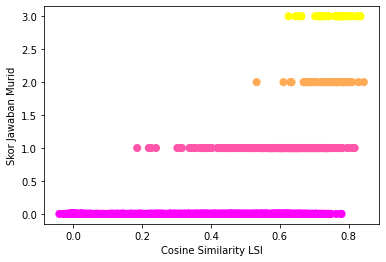

In [88]:
#Visualisasi Hasil
X_LSA = dfakhir.cosine_similarity_LSA
y = dfakhir.Score1
plt.scatter(X_LSA[1:], y[1:], c=y[1:], s=50, cmap='spring')
plt.xlabel("Cosine Similarity LSI")
plt.ylabel("Skor Jawaban Murid")

Text(0, 0.5, 'Cosine Similarity BoW')

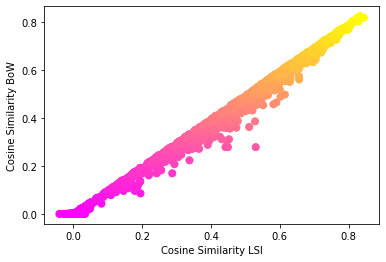

In [89]:
plt.scatter(X_LSA[1:], X[1:], c=X[1:], s=50, cmap='spring')
plt.xlabel("Cosine Similarity LSI")
plt.ylabel("Cosine Similarity BoW")

In [27]:
#Summary
dfakhir.groupby(by=["Score1"]).mean()

,cosine_similarity_LSA,level_0,cosine_similarity,index,Id,EssaySet,Score2
Score1,,,,,,,
0,0.359744,905.951114,0.339753,7484.951114,11871.951114,5.0,0.015816
1,0.604780,867.945122,0.585728,7446.945122,11833.945122,5.0,0.963415
2,0.728309,866.261905,0.711328,7445.261905,11832.261905,5.0,2.000000
3,0.758111,876.085714,0.746068,7267.114286,11528.771429,5.0,2.942857


In [28]:
dfakhir[dfakhir['Score1']==0].describe()

,cosine_similarity_LSA,level_0,cosine_similarity,index,Id,EssaySet,Score1,Score2
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.0,1391.0,1391.000000
mean,0.359744,905.951114,0.339753,7484.951114,11871.951114,5.0,0.0,0.015816
std,0.229380,517.726055,0.222929,517.726055,517.726055,0.0,0.0,0.124808
min,-0.040603,2.000000,0.000000,6581.000000,10968.000000,5.0,0.0,0.000000
25%,0.163635,451.500000,0.137872,7030.500000,11417.500000,5.0,0.0,0.000000
50%,0.399314,916.000000,0.365569,7495.000000,11882.000000,5.0,0.0,0.000000
75%,0.558284,1354.500000,0.535501,7933.500000,12320.500000,5.0,0.0,0.000000
max,0.779733,1794.000000,0.764069,8373.000000,12760.000000,5.0,0.0,1.000000


In [29]:
dfakhir[dfakhir['Score1']==1].describe()

,cosine_similarity_LSA,level_0,cosine_similarity,index,Id,EssaySet,Score1,Score2
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.0,328.0,328.000000
mean,0.604780,867.945122,0.585728,7446.945122,11833.945122,5.0,1.0,0.963415
std,0.114657,533.820152,0.116980,533.820152,533.820152,0.0,0.0,0.310671
min,0.185439,1.000000,0.180139,6580.000000,10967.000000,5.0,1.0,0.000000
25%,0.550329,419.250000,0.534641,6998.250000,11385.250000,5.0,1.0,1.000000
50%,0.625004,820.000000,0.608607,7399.000000,11786.000000,5.0,1.0,1.000000
75%,0.687485,1325.500000,0.667855,7904.500000,12291.500000,5.0,1.0,1.000000
max,0.817763,1795.000000,0.808779,8374.000000,12761.000000,5.0,1.0,2.000000


In [30]:
dfakhir[dfakhir['Score1']==2].describe()

,cosine_similarity_LSA,level_0,cosine_similarity,index,Id,EssaySet,Score1,Score2
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.0,42.000000
mean,0.728309,866.261905,0.711328,7445.261905,11832.261905,5.0,2.0,2.000000
std,0.064592,513.368268,0.064756,513.368268,513.368268,0.0,0.0,0.382546
min,0.532745,5.000000,0.520096,6584.000000,10971.000000,5.0,2.0,1.000000
25%,0.686899,458.000000,0.671576,7037.000000,11424.000000,5.0,2.0,2.000000
50%,0.736014,955.500000,0.718965,7534.500000,11921.500000,5.0,2.0,2.000000
75%,0.772040,1313.000000,0.758492,7892.000000,12279.000000,5.0,2.0,2.000000
max,0.844312,1714.000000,0.819689,8293.000000,12680.000000,5.0,2.0,3.000000


In [31]:
dfakhir[dfakhir['Score1']==3][1:].describe()

,cosine_similarity_LSA,level_0,cosine_similarity,index,Id,EssaySet,Score1,Score2
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.0,34.000000
mean,0.750997,901.852941,0.738599,7480.852941,11867.852941,5.0,3.0,2.941176
std,0.056574,388.058347,0.059566,388.058347,388.058347,0.0,0.0,0.238833
min,0.625626,15.000000,0.606761,6594.000000,10981.000000,5.0,3.0,2.000000
25%,0.716671,755.500000,0.702980,7334.500000,11721.500000,5.0,3.0,3.000000
50%,0.766487,891.000000,0.751468,7470.000000,11857.000000,5.0,3.0,3.000000
75%,0.788217,1080.500000,0.775310,7659.500000,12046.500000,5.0,3.0,3.000000
max,0.834606,1595.000000,0.826112,8174.000000,12561.000000,5.0,3.0,3.000000


In [32]:
#Uji Signifikansi Rataan
import scipy
scipy.stats.mannwhitneyu(X_LSA[1:], X[1:], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=1523653.0, pvalue=0.0024493775905099257)

# MACHINE LEARNING

In [33]:
#impor data
X_BoW = dfakhir.cosine_similarity[1:]
X_LSA = dfakhir.cosine_similarity[1:]
y = dfakhir.Score1[1:]

### Fitur Cosine BoW

In [48]:
#DECISION TREE
#Impor paket
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#Pemilahan data
X_train, X_test, y_train, y_test = train_test_split(X_BoW, y, test_size = 0.2, random_state = 42)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
X_train= np.array(X_train).reshape(-1, 1) 
clf_gini.fit(X_train, y_train)

X_test= np.array(X_test).reshape(-1, 1) 
y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7939


In [49]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
model1 = GridSearchCV(clf_gini, param_grid=params, n_jobs=-1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 123}


In [50]:
prediction=model1.predict(X_test)
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.7938718662952646
Confusion Metrix:
 [[276  60   2   0]
 [  2   6   1   1]
 [  1   3   3   4]
 [  0   0   0   0]]


### Fitur LSA

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_LSA, y, test_size = 0.2, random_state = 42)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
X_train= np.array(X_train).reshape(-1, 1) 
clf_gini.fit(X_train, y_train)

X_test= np.array(X_test).reshape(-1, 1) 
y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7939


In [52]:
#Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
model1 = GridSearchCV(clf_gini, param_grid=params, n_jobs=-1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.7938718662952646
Confusion Metrix:
 [[276  60   2   0]
 [  2   6   1   1]
 [  1   3   3   4]
 [  0   0   0   0]]


### Fitur BoW dan LSA

In [54]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

XBoWLSA=dfakhir[['cosine_similarity','cosine_similarity_LSA']]
yBoWLSA=dfakhir['Score1']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XBoWLSA, yBoWLSA, test_size = 0.2, random_state = 42)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.8222


In [55]:
from sklearn.model_selection import GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
model1 = GridSearchCV(clf_gini, param_grid=params, n_jobs=-1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.8277777777777777
Confusion Metrix:
 [[291  43   3   1]
 [  3   6   4   5]
 [  0   0   0   0]
 [  0   2   1   1]]


In [42]:
X_test

,cosine_similarity,cosine_similarity_LSA
1235,0.357782,0.367887
220,0.587177,0.617646
1517,0.520888,0.539567
438,0.340811,0.349453
1269,0.000000,-0.000558
...,...,...
1591,0.309849,0.339676
18,0.434190,0.455273
423,0.000000,0.018318
1202,0.455383,0.514505


In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
a = plot_tree(prediction)

TypeError: [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 3 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0] is not an estimator instance.

<Figure size 1800x720 with 0 Axes>

In [60]:
conda install python-graphviz


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sarah\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    astroid-2.5                |   py38haa95532_1         281 KB
    ca-certificates-2021.5.25  |       haa95532_1         112 KB
    conda-4.10.1               |   py38haa95532_1         2.9 MB
Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.11=py38_0
  - defaults/win-64::astroid==2.4.2=py38_0
  - defaults/win-64::pylint==2.6.0=py38_0
  - defaults/noarch::python-language-server==0.35.1=py_0
  - defaults/win-64::spyder==4.1.5=py38_0



    cython-0.29.23             |   py38hd77b12b_0         1.7 MB
    gmpy2-2.0.8                |   py38h7edee0f_3         145 KB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    libllvm9-9.0.1             |       h21ff451_0          61 KB
    mpc-1.1.0                  |       h7edee0f_1         260 KB
    mpfr-4.0.2                 |       h62dcd97_1         1.5 MB
    mpir-3.0.0                 |       hec2e145_1         1.3 MB
    openssl-1.1.1k             |       h2bbff1b_0         4.8 MB
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB
    snappy-1.1.8               |       h33f27b4_0          80 KB
    tbb-2021.2.0               |       h59b6b97_0         137 KB
    ------------------------------------------------------------
                                           Total:        42.7 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2020.07-py38_0
  cython             pkgs/main/win

In [72]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model1.best_estimator_, out_file=None, 
            filled=True, rounded=True, feature_names=['cosine_similarity_BoW','cosine_similarity_LSI'], class_names=['0','1','2','3'])

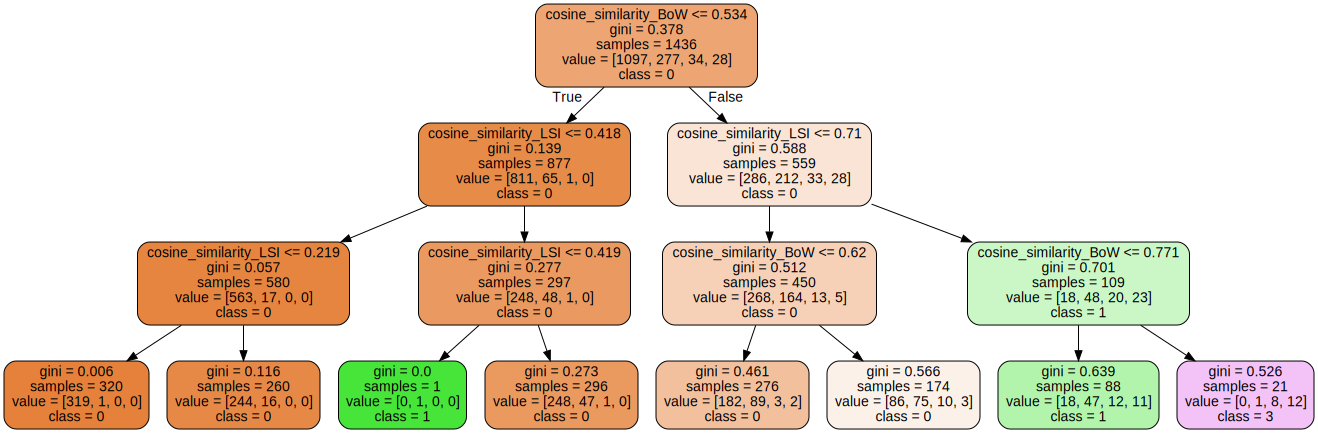

In [73]:
import graphviz

graph = graphviz.Source(dot_data)  
graph

In [83]:
conda install pydot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sarah\anaconda3
Note: you may need to restart the kernel to use updated packages.


  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydot-1.4.1                |   py38haa95532_0          43 KB
    ------------------------------------------------------------
                                           Total:          43 KB

The following NEW packages will be INSTALLED:

  pydot              pkgs/main/win-64::pydot-1.4.1-py38haa95532_0




pydot-1.4.1          | 43 KB     |            |   0% 
pydot-1.4.1          | 43 KB     | ###7       |  37% 
pydot-1.4.1          | 43 KB     | ########## | 100% 
pydot-1.4.1          | 43 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...

In [87]:
graph.render('dt.gv', view=True)  # doctest: +SKIP
'dt.gv.png'

'dt.gv.png'

In [84]:
import pydot
(graph, )  = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

AttributeError: 'str' object has no attribute 'getvalue'

In [43]:
#Cek Contoh Hasil
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [44]:
cek=pd.concat([pd.DataFrame(prediction), X_test.reset_index()], axis=1)
cek.head(16)

,0,index,cosine_similarity,cosine_similarity_LSA
0,0,1235,0.357782,0.367887
1,0,220,0.587177,0.617646
2,0,1517,0.520888,0.539567
3,0,438,0.340811,0.349453
4,0,1269,0.000000,-0.000558
5,0,832,0.545734,0.557098
6,0,692,0.478526,0.488923
7,0,1308,0.042934,0.043241
8,0,1100,0.311170,0.320749
9,2,1527,0.777426,0.796868


In [45]:
dfhasil.Score1[1177]

1

In [95]:
lemma

[['mrna',
  'exit',
  'nucleus',
  'via',
  'nuclear',
  'pore',
  'mrna',
  'travel',
  'through',
  'the',
  'cytoplasm',
  'to',
  'the',
  'ribosome',
  'or',
  'enters',
  'the',
  'rough',
  'endoplasmic',
  'reticulum',
  'mrna',
  'base',
  'are',
  'read',
  'in',
  'triplet',
  'called',
  'codon',
  'by',
  'rrna',
  'trna',
  'carrying',
  'the',
  'complementary',
  'u',
  'a',
  'c',
  'g',
  'anticodon',
  'recognizes',
  'the',
  'complementary',
  'codon',
  'of',
  'the',
  'mrna',
  'the',
  'corresponding',
  'amino',
  'acid',
  'on',
  'the',
  'other',
  'end',
  'of',
  'the',
  'trna',
  'are',
  'bonded',
  'to',
  'adjacent',
  'trna',
  's',
  'amino',
  'acid',
  'a',
  'new',
  'corresponding',
  'amino',
  'acid',
  'is',
  'added',
  'to',
  'the',
  'trna',
  'amino',
  'acid',
  'are',
  'linked',
  'together',
  'to',
  'make',
  'a',
  'protein',
  'beginning',
  'with',
  'a',
  'start',
  'codon',
  'in',
  'the',
  'p',
  'site',
  'initiation',
 

In [96]:
#Impor Paket
import nltk
import re
import numpy as np
from gensim import corpora, similarities
from gensim.models import LsiModel
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")

#Proses
documents_test=['synthesis, protein']
documents_train=[['protein'],['mrna', 'travel', 'ribosome'],['synthesis']]
dictionary = corpora.Dictionary(
    lemma
   for lemma in lemma)
corpus = [
  dictionary.doc2bow(lemma)
  for lemma in lemma]
lsi_model = LsiModel(
        corpus=corpus,
        id2word=dictionary 
        )
print(lsi_model.get_topics())
print([lsi_model[lemma] for lemma in corpus])
cosine_similarity_matrix = similarities.MatrixSimilarity(lsi_model[corpus])
print([row for row in cosine_similarity_matrix])
vector_lsi_test = lsi_model[dictionary.doc2bow(documents_test)]
cosine_similarities_test = cosine_similarity_matrix[vector_lsi_test]
#vector_lsi_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[-1.24421025e-01 -8.45393748e-02 -3.33351931e-03 ... -1.76949951e-04
  -1.76949951e-04 -1.76949951e-04]
 [ 1.38650020e-02 -6.32943829e-02  1.81873936e-03 ...  7.59054680e-05
   7.59054680e-05  7.59054680e-05]
 [ 4.72131148e-01  4.20163088e-01  7.72442559e-03 ...  2.08380523e-04
   2.08380523e-04  2.08380523e-04]
 ...
 [-6.67674742e-04 -7.25794220e-02 -6.77384999e-03 ... -9.68953859e-03
  -9.68953859e-03 -9.68953859e-03]
 [-7.44712284e-03 -7.03145850e-02 -4.47146894e-03 ...  2.45712251e-03
   2.45712251e-03  2.45712251e-03]
 [-2.02580978e-03  8.25980059e-02 -1.86038401e-03 ... -1.01967785e-02
  -1.01967785e-02 -1.01967785e-02]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([0.9999996 , 0.6481325 , 0.1713824 , ..., 0.22323164, 0.44784576,
       0.6943841 ], dtype=float32), array([0.6481325 , 1.0000002 , 0.22513586, ..., 0.23688182, 0.45540792,
       0.64062893], dtype=float32), array([0.1713824 , 0.22513586, 0.99999964, ..., 0.15227595, 0.26618958,
       0.24572133], dtype=float32), array([0.34401557, 0.33651823, 0.07112513, ..., 0.06076273, 0.13497657,
       0.2981306 ], dtype=float32), array([0.6102409 , 0.72151005, 0.21948466, ..., 0.5438408 , 0.43669856,
       0.6785299 ], dtype=float32), array([0.70907384, 0.6226463 , 0.20310536, ..., 0.20157234, 0.30296624,
       0.6792129 ], dtype=float32), array([0.3433225 , 0.40756834, 0.07154775, ..., 0.35043973, 0.30010095,
       0.38776812], dtype=float32), array([0.5546502 , 0.6070209 , 0.16803011, ..., 0.2863758 , 0.32791924,
       0.7472665 ], dtype=float32), array([0.5405513 , 0.5775712 , 0.2848648 , ..., 0.09897646, 0.34843278,
       0.5046095 ], dtype=float32), array([0.674533  , 0.677283